# Model Comparison and Final Conclusions

In this notebook, we compare the performance of different regression models trained throughout the project, focusing on their generalization ability. The goal is to identify which model provides the best balance between bias and variance.

## Models Evaluated

The following models are compared:

- Linear Regression (baseline)
- Ridge Regression
- Lasso Regression

All models are evaluated using RMSE and R² on both training and test sets.

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Dataset Overview

The dataset used in this project is the California Housing dataset, which contains numerical features related to housing districts in California.

The target variable is the median house value, and all features are continuous, making this a regression problem.

In [17]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.shape

(20640, 9)

In [19]:
df.to_csv("../data/california_housing.csv", index=False)

## Feature and Target Definition

The dataset is divided into:
- **Features (X):** All explanatory variables related to income, population, location, and housing characteristics.
- **Target (y):** The median house value (`MedHouseVal`).

This separation allows the models to learn the relationship between housing attributes and house prices.

In [20]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

## Train-Test Split

The dataset is split into training and test sets using an 80/20 ratio.

This separation ensures that model performance is evaluated on unseen data, which is essential for analyzing generalization ability.

In [28]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Evaluation Strategy

Each model is evaluated using the following metrics:

- **RMSE (Root Mean Squared Error):** Measures prediction error magnitude.
- **R² Score:** Indicates how well the model explains the variance of the target variable.

Metrics are computed for both training and test sets to assess generalization performance.

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return rmse_train, rmse_test, r2_train, r2_test

## Model Selection

Three regression models are evaluated:

- **Linear Regression:** A baseline model with no regularization.
- **Ridge Regression:** Adds L2 regularization to reduce coefficient magnitude.
- **Lasso Regression:** Uses L1 regularization, which can eliminate less important features.

These models allow us to analyze the impact of regularization on generalization.

## Model Performance Results

The table below summarizes the performance of each model on both training and test datasets.

Comparing these metrics allows us to identify models that generalize well and those that may suffer from underfitting or overfitting.

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = []

for name, model in models.items():
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(
        model, X_train, X_test, y_train, y_test
    )

    results.append({
        "Model": name,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    })

results_df = pd.DataFrame(results)
results_df

,Model,RMSE Train,RMSE Test,R2 Train,R2 Test
0,Linear Regression,0.719676,0.745581,0.612551,0.575788
1,Ridge Regression,0.719676,0.745522,0.612551,0.575855
2,Lasso Regression,0.776531,0.783270,0.548915,0.531817


## Generalization Gap Analysis

To better understand model behavior, the difference between training and test RMSE (RMSE Gap) is calculated.

- A **small gap** suggests good generalization.
- A **large gap** indicates potential overfitting.
- Poor performance on both sets may indicate underfitting.

In [24]:
results_df["RMSE Gap"] = results_df["RMSE Test"] - results_df["RMSE Train"]
results_df.sort_values("RMSE Test")

,Model,RMSE Train,RMSE Test,R2 Train,R2 Test,RMSE Gap
1,Ridge Regression,0.719676,0.745522,0.612551,0.575855,0.025847
0,Linear Regression,0.719676,0.745581,0.612551,0.575788,0.025906
2,Lasso Regression,0.776531,0.783270,0.548915,0.531817,0.006739


## Model Comparison

By ranking models based on their test performance and generalization gap, it is possible to identify the most reliable model for this problem.

This comparison highlights the trade-off between model complexity and predictive performance.

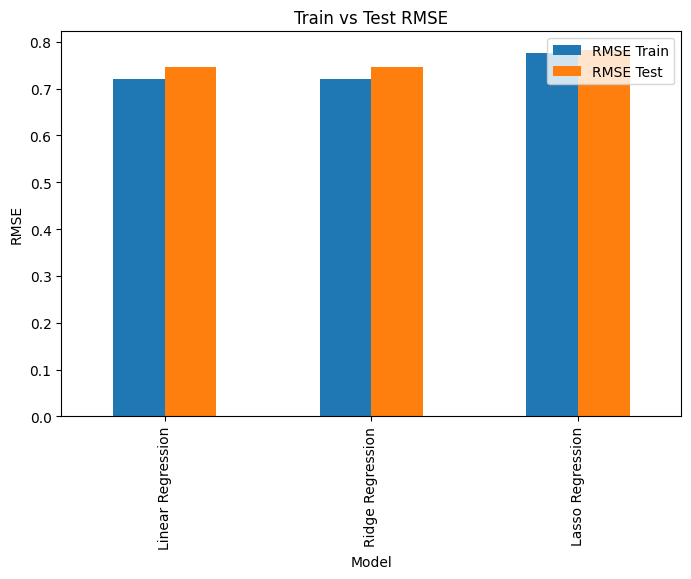

In [25]:
results_df.set_index("Model")[["RMSE Train", "RMSE Test"]].plot(
    kind="bar", figsize=(8,5)
)
plt.title("Train vs Test RMSE")
plt.ylabel("RMSE")
plt.show()


## Conclusion

The results show that Linear Regression and Ridge Regression achieved very similar performance, both demonstrating good generalization with low error gaps between training and test sets.

Ridge Regression obtained the best overall performance on the test set, making it the most suitable model for this dataset.

Lasso Regression exhibited strong regularization and a smaller generalization gap, but at the cost of reduced predictive performance, indicating mild underfitting.